<h1 align="center">Introduction to Probability </h1>
<br>
<img src="probability.jpg" alt="Python" style="width: 400px;"/>

## Agenda for the Day
***
- Basic Probability
- Conditional Probability
- Bayes Theorem
- Random Variable
- Probability Distributions
- Normal Distribution

## Basic Probability - Intuition
***

 - Let's start with a simple example: Say, we flip a fair coin
 
 - Intuitively, there's a 50% chance of getting heads, and a 50% chance of getting tails. This is because there are only two possible outcomes, and each event is equally likely.
 
 - Therefore, we can say that the **Probability** of getting a *Heads* is 0.5. Similarly, Probability of getting a *Tails* is 0.5 
 
 - **Probability can roughly be described as "the percentage chance of an event or sequence of events occurring".**


## Basic Probability - Intuition

Some common terms thrown around are: 

* **Experiment** – are the uncertain situations, which could have multiple outcomes. A coin toss is an experiment.
* **Outcome** is the result of a single trial. So, if head lands, the outcome of or coin toss experiment is “Heads”
* **Event** is one or more outcomes from an experiment. “Tails” is one of the possible events for this experiment.


## Get it? 
***
<center><img src="probab1.png" alt="Drawing" style="width: 600px;"/></center>

## Basic Probability - Easy Rules
***
These are a list of some comprehensive rules Probability must follow: 

 - The Probability that nothing occurs is 0 
 - The Probability that something occurs is 1
 - The probability of something is 1 minus the probability that the opposite occurs
 
 - The probability of at least 1 of 2 (or more) things that can not simultaneously occur (mutually exclusive) is the sum of their respective probabilities
 
 - **"Mutually exclusive"** is a statistical term describing two or more events that cannot occur simultaneously. For example, it is impossible to roll a five and a three on a single die at the same time. 

## Basic Probability - Easy Rules
***
 - For any 2 events the probability that at least one occurs is the sum of their probabilities minus their intersection
 
## **In-class Activity** 
 
 - The National Sleep Foundation reports that around 3% of the American population has sleep-breathing issues. They also report that around 10% of the American population has *restless leg syndrome*. Does this imply that 13% of people will have at least one sleep problems of these sorts?

Answer: No, the events can simultaneously occur and so are not mutually exclusive. To elaborate: 
***
<center><img src="probab.png" alt="Drawing" style="width: 600px;"/></center>

## Calculating probability 
***
- We have a dataset having details of the House Price and certain other faetures.
- Lets check the Probability of picking a house in the Neighborood of "OldTown"

- This is nothing but: 
   - No. of houses in OldTown/Total no. of houses
   
- Let's go through this in Python

In [10]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [17]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
data = data[["Id","LotArea", "Neighborhood", "BldgType", "HouseStyle", "OverallQual", "OverallCond", "YearBuilt", "Heating", "GrLivArea", "TotRmsAbvGrd", "GarageType", "GarageYrBlt", "GarageCars", "GarageArea", "YrSold", "SaleCondition", "SalePrice"]]
data.to_csv("train1.csv")

In [12]:
# data.info()
# data['Neighborhood'].value_counts()

In [13]:
all_houses = data.shape[0]
houses_in_OldTown = data[data['Neighborhood'] == 'OldTown'].shape[0]
print('Probability of picking a house in OldTown: {}'.format(houses_in_OldTown/all_houses))

Probability of picking a house in OldTown: 0.0773972602739726


Thus, from the output above we can state that: 

At random, the probability of choosing a house from the data set in the "OldTown" neighborhood is *0.077*

- Having found out the probability of picking a house from the "OldTown" neighborhood, let's go little further.


- Even though this would be pretty redundant, but when picking **1 by 1**, what would be the probability of first picking a house from the "OldTown" neighborhood and then **AGAIN** picking a house from the **SAME** neighborhood? 


- This is nothing but Conditional Probability!

- This might sound a little complicated at first but let's break it down by starting with an easy example! 

## Conditional Probability - Intuition (1/2)
***
Let's say that we're eating some M&Ms. 

 - There are 10 M&Ms left in the bag: 5 are green, and 5 are blue.
 
 - What is the probability of getting 3 blue candies in a row? 
     - The probability of getting the first blue candy is 5/10, or 1/2. 
     - When we pick a blue candy, though, we remove it from the bag. We're left with **9** candies in total with (5-1 =)4 Blue ones.
     - So the probability of getting another blue is 4/9. 
     - Similarly, the probability of picking a third blue candy is 3/8
     
     

## Conditional Probability - Intuition (2/2)
***
- Since we're calculating the probability of picking 1 Blue Candy AND 1 Blue Candy AND 1 Blue Candy

    - Our final probability is 1/2 \* 4/9 \* 3/8, or .0833. So, there is an 8.3% chance of picking three blue candies in a row.
    
    
- **Simple tricks**: Whenever you have to *verbally* say AND (like we just did above), you will want to **MULTIPLY** the probabilities


- Whenever you have to *verbally* say OR, you will want to **ADD** the probabilities. 
    

## In-class Activity - Can you solve this on your own? 
***
1) What is the probability of picking a green candy OR a blue candy?

2) Consider we have 7 green candies and 5 blue candies. What is the probability of picking (one by one, and without replacing) 2 green candies OR 2 blue candies? 

Answers : 

1) $(5/10)+(5/10)=1$

2) $(7/12)*(6/11)+(5/12)*(4/11)=(62/132)$


## Conditional Probability
***
To summarize, **Conditional probability is the probability of an  event A occurring, given that B has already occurred.**

- It is also denoted by:
***
<center><img src="probab2.png" alt="Drawing" style="width: 400px;"/></center>


## Conditional Probability
***
Coming back to calculating probability: 

 - What would be the probability of first picking a house from the "OldTown" neighborhood and then **AGAIN** picking a house from the **SAME** neighborhood?
 
 - Let's find this out in Python. 


In [15]:
## Enter condtional probability code
(houses_in_OldTown/all_houses) * ((houses_in_OldTown - 1)/(all_houses - 1))

0.0059413935234303855

## Independent Events
***

- Two events are independent, one event does not influence the probability of another event.
- Two events, A and B are independent if and only if  $P(A and B)=P(A)×P(B)$

Some examples of independent events:
- Owning a dog and growing your own herb garden.
- Paying off your mortgage early and owning a Chevy Cavalier.
- Winning the lottery and running out of milk.


## Dependent or Independent
***
<center><img src="probab4.png" alt="Drawing" style="width: 400px;"/></center>

## Find it out yourself

A bag contains 5 red and 5 blue balls. We remove a random ball from the bag, record its colour and put it back into the bag. We then remove another random ball from the bag and record its colour.


#### What is the probability that the first ball is red?


Since there are a total of 10 balls, of which 5 are red, the probability of getting a red ball is

<br>P(first ball red)=5/10=1/2


#### What is the probability that the second ball is blue?

The problem states that the first ball is placed back into the bag before we take the second ball. This means that when we draw the second ball, there are again a total of 10 balls in the bag, of which 5 are blue. 

<br>Therefore the probability of drawing a blue ball is
P(second ball blue)=5/10=1/2


#### What is the probability that the first ball is red and the second ball is blue?

When drawing two balls from the bag, there are 4 possibilities. We can get

- a red ball and then another red ball;
- a red ball and then a blue ball;
- a blue ball and then a red ball;
- a blue ball and then another blue ball.

We want to know the probability of the second outcome, where we have to get a red ball first. Since there are 5 red balls and 10 balls in total, there are 5/10 ways to get a red ball first. Now we put the first ball back, so there are again 5 red balls and 5 blue balls in the bag. 


<br>Therefore there are 5/10 ways to get a blue ball second if the first ball was red. This means that there are
5/10×5/10=25/100 ways to get a red ball first and a blue ball second.


<br>So, the probability of getting a red ball first and a blue ball second is 1/4.


#### Are the first ball being red and the second ball being blue independent events?

According to the definition, events are independent if and only if
P(A and B)=P(A)×P(B)
<br>In this problem:

- P(first ball red)=1/2
- P(second ball blue)=1/2
- P(first ball red and second ball blue)=1/4

Since 1/4=1/2×1/2, the events are independent.

## In Class-Activity:

One hundred people line up to board an aeroplane. Each has a boarding pass with an assigned seat. However, the first person to the board has lost his boarding pass and takes a random seat. After that, each person takes the assigned seat if it is unoccupied, and one of the unoccupied seats at random otherwise. What is the probability that the last person to board gets to sit in his assigned seat?


#### Solution:- 

Look at the situation when the k’th passenger enters. Neither of the previous passengers showed any preference for the k’th seat vs. the seat of the first passenger. This, in particular, is true when k = n. But the n’th passenger can only occupy his seat or the first passenger’s seat. Therefore the probability is 1/2.


## Bayes Theorem
***

Remeber the conditional probability. The conditional probability of event A, given that event B has already occured is given as 


## Application of Bayes Theorem
***



## A classic example: The famous Monty Hall Problem
***

You’re on a game show, and you’re given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what’s behind the doors, opens another door, say No. 3, which has a goat. He then says to you, “Do you want to pick door No. 2?” Is it to your advantage to switch your choice? Will you switch or stay with your door?


## Random Variable
***
A random variable, usually written $X$, is a variable whose possible values are numerical outcomes of a random phenomenon. There are two types of random variables, discrete and continuous.

 - A **discrete variable** is a variable whose value is obtained by counting
    - Examples:  number of students present, number of red marbles in a jar, number of heads when flipping three coins
    
 
 - A **continuous variable** is a variable whose value is obtained by measuring
    - Examples: height of students in class, weight of students in class, time it takes to get to school, distance traveled between classes
    
- The probability function for a discrete random variable is the `probability mass function` and similarly if our random variable takes continuous values it is called a `probability density function`


## Some Basic Concepts 
***
 
 - We know what the outcome of an experiment is. 
 
 - Now, depending on the experiment, our outcome can have a range of possible values 
 
 - Each value has a specific, probability assigned to it. These probabilities may or may not be equal to one another
 
 - Now, like always, there is a Statistical Function that describes these values within a given range
 
 - This is nothing but the Probability Distribution of the event
 
 - Confused? You're not the first..
 
 - Let's try and build some intuition with an easy example

## Simple Probability Distribution
***
 -  Lets try and plot a simple probability distribution
 
 - Let a random variable X be the sum of two fair six sided dice throws
 
 - X can take values (2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
 
 - Can you figure our the proability of each value of X? 

## Simple Probability Distribution
***
- There are 6 possibilities in the first throw (we can get any number). We can get any no. from 1 to 6 

- 6 in the second

- Total no. of Combinations = 6\*6 = 36

Let’s see how:
2{(1,1)}  => 1/36

3{(1,2),(2,1)} => 2/36

4{(2,2),(3,1),(1,3)} => 3/36

5{(1,4),(4,1),(2,3),(3,2)} => 4/36

6{(3,3),(1,5),(5,1),(2,4),(4,2)} => 5/36

7{(1,6),(6,1),(2,5),(5,2),(3,4),(4,3)} => 6/36

8{(2,6),(6,2),(3,5),(5,3),(4,4)} => 5/36

9{(3,6),(6,3),(5,4),(4,5)} => 4/36

10{(4,6),(6,4),(5,5)} => 3/36

11{(5,6),(6,5)} => 2/36

12{(6,6)} = > 1/36



## Plotting our results
When we plot the values [2,12] on the x-axis vs. the probability of getting each of these values as our Outcome we see the following: 
***
<center><img src="probab3.png" alt="Drawing" style="width: 500px;"/></center>
 


 - We just plotted the Probability Mass Function of a Discrete Random Variable (X which is the sum of two fair dies)
 
 - We will now take a look at some of these general probability distributions which are widely used in statistical computations.

## Binomial Distribution

***



## Normal Distribution (1/4)
***
 - Data can be "distributed" (spread out) in different ways
***
<center><img src="probab5.png" alt="Drawing" style="width: 500px;"/></center>



## Normal Distribution (2/4)
***
 - But there are many cases where the data tends to be around a central value with no bias left or right, and it gets close to a "Normal Distribution" like this:
***
<center><img src="probab6.png" alt="Drawing" style="width: 500px;"/></center>



## Normal Distribution (3/4)
***
 - It is known as a "Bell Curve" because it literally looks like a bell
 
 - Many things closely follow a Normal Distribution:
    - heights of people
    - size of things produced by machines
    - errors in measurements
    - blood pressure
    - marks on a test


## Normal Distribution (4/4)
***
 - We say that the data is "Normally Distributed" 
 
 - The Normal Distribution has:
    - mean = median = mode
    - symmetry about the center
    - 50% of values less than the mean 
    - and 50% greater than the mean
    - The total area under the curve is 1.


## Normal Distribution
***

<center><img src="probab7.png" alt="Drawing" style="width: 500px;"/></center>
 

## Normal Distributions and Standard Deviations
***
 - Yesterday we learnt about Standard Deviation and how it's the most commonly used measure of how spread out observations of our data are
 
 - When we calculate the standard deviation we find that (generally):
 
    - 68% of values are within 1 standard deviation	of the mean
    - 95% of values are within 2 standard deviations of the mean
    - 99.7% of values are within 3 standard deviations of the mean

<center><img src="probab8.png" alt="Drawing" style="width: 500px;"/></center>


## Math behind the Normal Distribution
***
- So how do we get a Bell Curve? 
- As discussed before, there is a Statistical Function that describes it's shape, just like any other graph in Mathematics

 ***
<center><img src="probab9.png" alt="Drawing" style="width: 500px;"/></center>

## Looking at House Price Data 
***
 - We know that John had the SalePrice data of the 1460 houses in Brooklyn
 
 - Let's plot a graph that shows us the SalePrice vs. the Frequency of that Price
 
 - Work it out in Python

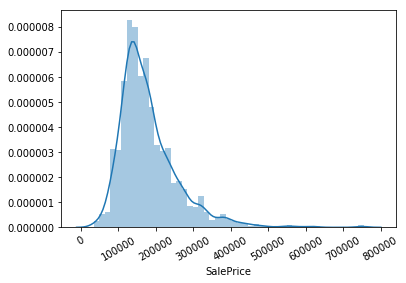

In [16]:
plt.xticks(rotation=30)
sns.distplot(data['SalePrice'])

## Thoughts 
***
The distribution is for our target variable aka SalePrice doesn't resemble a normal distribution, it is skewed to the left

 - This makes some sense since we already saw yesterday that we had a lot of Outliers on the upper-end of the Price scale
 
 - If you were to remove the outliers, it'd somewhat resemble a Normal Dstribution

## The Concept of Z-score (1/5)
***
 - The number of standard deviations from the mean is also called the "Standard Score", "sigma" or "z-score". Get used to those words!
 

## The Concept of Z-score (2/5)
***
- As usual, let's build our intution with an Example
    - Consider that we're analyzing data of the heights (in meters) of students in a school 
    - The data is normally distributed as shown below:
 ***
<center><img src="probab10.png" alt="Drawing" style="width: 500px;"/></center>


## The Concept of Z-score (3/5)
***
 - We can see that the mean = 1.4 meters
 - In that same school one of your friends is 1.85m tall
 - You can see on the bell curve that 1.85m is 3 standard deviations from the mean of 1.4, so:
 - **Your friend's height has a "z-score" of 3.0**
 


## The Concept of Z-score (4/5)
***
 - It is also possible to calculate how many standard deviations 1.85 is from the mean
      - How far is 1.85 from the mean?
      - It is 1.85 - 1.4 = 0.45m from the mean
 
 - Say that the Std. Dev. is pre-calculated and is = 0.15m
 
 - How many standard deviations is is it from the mean? The standard deviation is 0.15m, so:

     - = 0.45m / 0.15m = 3 standard deviations

## The Concept of Z-score (5/5)
***
So to convert a value to a Standard Score ("z-score"):

 - first subtract the mean,
 - then divide by the Standard Deviation

And doing that is called "Standardizing":
 ***
<center><img src="probab11.png" alt="Drawing" style="width: 500px;"/></center>


## In Class Activity
***
Example: Travel Time

A survey of daily travel time had these results (in minutes):

26, 33, 65, 28, 34, 55, 25, 44, 50, 36, 26, 37, 43, 62, 35, 38, 45, 32, 28, 34

Convert the values to z-scores ("standard scores").

Don't forget:
 ***
<center><img src="probab12.png" alt="Drawing" style="width: 500px;"/></center>


# Thank You
***
### Next Session: Exploratory Data Analysis